# Airline Data Flight Example

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

print(sys.version)
print(pd.__version__)
print(np.__version__)

3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
1.4.4
1.21.5


---

### get dataframe prepared (with all the datawranging required -- recall the html issue)

In [2]:
# 1. import the new csv file

df1 = pd.read_csv("fresh_start_airline_gn.csv")

In [3]:
# 2. check the df

df1.head(5)

,Unnamed: 0,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,1994-06-05,7,"1,542.00",1540,"1,819.00",1815,US,236,NaN,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1,1994-06-06,1,"1,549.00",1540,"1,831.00",1815,US,236,NaN,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2,1994-06-07,2,"1,540.00",1540,"1,803.00",1815,US,236,NaN,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,3,1994-06-08,3,"1,541.00",1540,"1,808.00",1815,US,236,NaN,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,4,1994-06-09,4,"1,541.00",1540,"1,835.00",1815,US,236,NaN,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [4]:
# 3. delete the unnamed columns added 

df = df1.loc[:, ~df1.columns.str.contains('^Unnamed')]

In [5]:
# 4. check the new df

df.head(5)

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1994-06-05,7,"1,542.00",1540,"1,819.00",1815,US,236,NaN,157.00,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1994-06-06,1,"1,549.00",1540,"1,831.00",1815,US,236,NaN,162.00,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1994-06-07,2,"1,540.00",1540,"1,803.00",1815,US,236,NaN,143.00,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1994-06-08,3,"1,541.00",1540,"1,808.00",1815,US,236,NaN,147.00,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1994-06-09,4,"1,541.00",1540,"1,835.00",1815,US,236,NaN,174.00,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


---

# converting numerical to categorical data

In [6]:
df.FlightNum.describe()

count   426,490.00
mean        901.69
std         593.51
min           1.00
25%         407.00
50%         792.00
75%       1,429.00
max       3,219.00
Name: FlightNum, dtype: float64

In [7]:
# the average flight number data is useless

# it does not matter if it is flight 1 or flight 99

        # those are just categories
        # it could just as well be flight G

In [8]:
# pandas thinks about this as numerical data, not categorical data

In [9]:
# sometimes you have relatively continuous data tht should be categorical data
### these should be grouped as bins

##### maybe elapsed time is in this category
# wehre you say, 1-200 is one category

# you could say, 1-100: short hop, 100-200 - medium hop, 200-400: long hop

---

# bins

In [10]:
# departure and arrival times are in military format

# create them into bins

In [11]:
# this converts a continuous variable to a categorical one

In [12]:
# we are looking at actual departure times (not scheduled)

In [13]:
ranges = [0, 600, 1200, 1800, 2400]

In [14]:
labels = ['Early Morning', 'Morning', 'Early Afternoon', 'Evening']

## cut

In [15]:
# DepTime: actual
# CRSDEpTime: Scheduled

In [16]:
df['DepTime2'] = pd.cut(df.DepTime, ranges, labels=labels).astype('category')

In [17]:
df['ArrTime2'] = pd.cut(df.ArrTime, ranges, labels=labels).astype('category')

---

## average time delays

In [18]:
df.groupby(['DepTime2', 'ArrTime2'])[['DepDelay', 'ArrDelay']].mean()

DepDelay  ArrDelay
DepTime2        ArrTime2                           
Early Morning   Early Morning       43.80     42.07
                Morning              2.58      2.11
                Early Afternoon       NaN       NaN
                Evening             64.00     61.33
Morning         Early Morning         NaN       NaN
                Morning              2.37      0.66
                Early Afternoon      3.77      4.10
                Evening              5.41     12.92
Early Afternoon Early Morning        8.89     14.45
                Morning              4.90      2.48
                Early Afternoon      5.17      4.57
                Evening              7.63     11.08
Evening         Early Morning       36.96     42.04
                Morning              5.46      7.63
                Early Afternoon     29.14     22.50
                Evening             13.67     12.76

---

# variation in the delays

In [19]:
transformations = [np.mean, np.std]

In [20]:
agg_dict = {'ArrDelay': transformations,  'DepDelay' : transformations}

In [21]:
df.groupby(['DepTime2', 'ArrTime2']).agg(agg_dict)

ArrDelay       DepDelay      
                                    mean   std     mean   std
DepTime2        ArrTime2                                     
Early Morning   Early Morning      42.07 91.24    43.80 91.84
                Morning             2.11 18.44     2.58 16.60
                Early Afternoon      NaN   NaN      NaN   NaN
                Evening            61.33  5.51    64.00  8.89
Morning         Early Morning        NaN   NaN      NaN   NaN
                Morning             0.66 13.45     2.37 10.22
                Early Afternoon     4.10 17.17     3.77 12.48
                Evening            12.92 24.19     5.41 15.70
Early Afternoon Early Morning      14.45 42.65     8.89 27.35
                Morning             2.48 11.08     4.90  8.72
                Early Afternoon     4.57 18.71     5.17 14.86
                Evening            11.08 28.07     7.63 19.32
Evening         Early Morning      42.04 74.14    36.96 65.64
                Morning             7.63 17.13     5.46 12.30
                Early Afternoon    22.50 30.93    29.14 32.23
                Evening            12.76 34.13    13.67 39.55

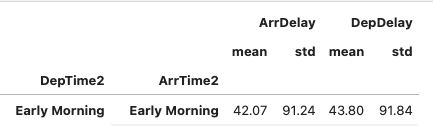

---

# which flights are worst for delays

In [26]:
df['TotalDelay'] = df.ArrDelay + df.DepDelay

### cut for binning

In [27]:
df['ScheduledDepTime'] = pd.cut(df.CRSDepTime, ranges, labels = labels)

In [30]:
def average_delay(dataframe):
    dataframe['AvgFlightDelay'] = dataframe.TotalDelay.mean()
    return dataframe

## approach 1: simple

### execute function on the df dataframe

In [31]:
avg_delayed = df.groupby('FlightNum').apply(average_delay)

In [32]:
avg_delayed.head()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime2,ArrTime2,TotalDelay,ScheduledDepTime,AvgFlightDelay
0,1994-06-05,7,"1,542.00",1540,"1,819.00",1815,US,236,NaN,157.00,...,NaN,NaN,NaN,NaN,NaN,Early Afternoon,Evening,6.00,Early Afternoon,13.61
1,1994-06-06,1,"1,549.00",1540,"1,831.00",1815,US,236,NaN,162.00,...,NaN,NaN,NaN,NaN,NaN,Early Afternoon,Evening,25.00,Early Afternoon,13.61
2,1994-06-07,2,"1,540.00",1540,"1,803.00",1815,US,236,NaN,143.00,...,NaN,NaN,NaN,NaN,NaN,Early Afternoon,Evening,-12.00,Early Afternoon,13.61
3,1994-06-08,3,"1,541.00",1540,"1,808.00",1815,US,236,NaN,147.00,...,NaN,NaN,NaN,NaN,NaN,Early Afternoon,Evening,-6.00,Early Afternoon,13.61
4,1994-06-09,4,"1,541.00",1540,"1,835.00",1815,US,236,NaN,174.00,...,NaN,NaN,NaN,NaN,NaN,Early Afternoon,Evening,21.00,Early Afternoon,13.61


## <font color = red> Sample

In [33]:
avg_delayed.sample()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime2,ArrTime2,TotalDelay,ScheduledDepTime,AvgFlightDelay
385223,1994-06-20,1,"1,423.00",1415,"1,546.00",1532,AS,438,NaN,83.00,...,NaN,NaN,NaN,NaN,NaN,Early Afternoon,Early Afternoon,22.00,Early Afternoon,15.70


In [34]:
avg_delayed.sample(5)

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime2,ArrTime2,TotalDelay,ScheduledDepTime,AvgFlightDelay
377977,1994-06-07,2,"1,659.00",1700,"1,917.00",1927,AA,2245,NaN,138.00,...,NaN,NaN,NaN,NaN,NaN,Early Afternoon,Evening,-11.00,Early Afternoon,0.81
263569,1994-06-12,7,"1,016.00",1020,"1,116.00",1115,DL,1237,NaN,60.00,...,NaN,NaN,NaN,NaN,NaN,Morning,Morning,-3.00,Morning,5.14
80956,1994-06-13,1,"1,030.00",1030,"1,131.00",1125,WN,604,NaN,61.00,...,NaN,NaN,NaN,NaN,NaN,Morning,Morning,6.00,Morning,10.87
158161,1994-06-04,6,"2,148.00",2150,"2,233.00",2234,UA,228,NaN,45.00,...,NaN,NaN,NaN,NaN,NaN,Evening,Evening,-3.00,Evening,9.54
34177,1994-06-25,6,845.00,820,931.00,912,US,1238,NaN,46.00,...,NaN,NaN,NaN,NaN,NaN,Morning,Morning,44.00,Morning,21.80


---

## approach 2: more compact

In [35]:
df2 = df.groupby('FlightNum').agg({'TotalDelay': np.mean})
df2

,TotalDelay
FlightNum,
1,6.40
2,7.01
3,9.38
4,17.79
5,6.25
...,...
3010,36.74
3197,13.24
3203,3.18


In [36]:
#df2.sorted('TotalDelay')

df2.sort_values(by = ['TotalDelay'], ascending = False)

,TotalDelay
FlightNum,
2849,183.33
1428,173.78
2928,150.50
2835,124.33
2252,112.23
...,...
2314,-15.00
2628,-16.25
2280,-18.00


In [37]:
df.groupby('FlightNum').agg({'TotalDelay': np.mean}).\
            sort_values(by = ['TotalDelay'], ascending = False)

,TotalDelay
FlightNum,
2849,183.33
1428,173.78
2928,150.50
2835,124.33
2252,112.23
...,...
2314,-15.00
2628,-16.25
2280,-18.00


---

## ranking function to cretae a generic way to do this

In [38]:
def ranking(dataframe, column):
    dataframe.sort_values(column, ascending = False, inplace = True)
    dataframe[column + 'Rank'] = np.arange(len(dataframe))+ 1
    return dataframe

---

# rank flights by aveage delay

# new df

In [39]:
avg_delayed_ranked = avg_delayed.groupby\
('ScheduledDepTime').\
apply(lambda x:ranking(x, 'AvgFlightDelay'))

In [40]:
avg_delayed_ranked.head()

Date  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
ScheduledDepTime                                                               
Early Morning    269530  1994-06-02          4    51.00         110   109.00   
                 269529  1994-06-01          3   115.00         110   134.00   
                 269532  1994-06-04          6   108.00         110   127.00   
                 269533  1994-06-05          7   100.00         110   122.00   
                 269534  1994-06-06          1    58.00         110   113.00   

                         CRSArrTime UniqueCarrier  FlightNum  TailNum  \
ScheduledDepTime                                                        
Early Morning    269530         131            DL       1490      NaN   
                 269529         131            DL       1490      NaN   
                 269532         131            DL       1490      NaN   
                 269533         131            DL       1490      NaN   
                 269534         131            DL       1490      NaN   

                         ActualElapsedTime  ...  WeatherDelay  NASDelay  \
ScheduledDepTime                            ...                           
Early Morning    269530              18.00  ...           NaN       NaN   
                 269529              19.00  ...           NaN       NaN   
                 269532              19.00  ...           NaN       NaN   
                 269533              22.00  ...           NaN       NaN   
                 269534              15.00  ...           NaN       NaN   

                         SecurityDelay  LateAircraftDelay       DepTime2  \
ScheduledDepTime                                                           
Early Morning    269530            NaN                NaN  Early Morning   
                 269529            NaN                NaN  Early Morning   
                 269532            NaN                NaN  Early Morning   
                 269533            NaN                NaN  Early Morning   
                 269534            NaN                NaN  Early Morning   

                              ArrTime2  TotalDelay  ScheduledDepTime  \
ScheduledDepTime                                                       
Early Morning    269530  Early Morning      -41.00     Early Morning   
                 269529  Early Morning        8.00     Early Morning   
                 269532  Early Morning       -6.00     Early Morning   
                 269533  Early Morning      -19.00     Early Morning   
                 269534  Early Morning      -30.00     Early Morning   

                         AvgFlightDelay  AvgFlightDelayRank  
ScheduledDepTime                                             
Early Morning    269530           36.88                   1  
                 269529           36.88                   2  
                 269532           36.88                   3  
                 269533           36.88                   4  
                 269534           36.88                   5  

[5 rows x 33 columns]

In [41]:
avg_delayed_ranked[avg_delayed_ranked\
                   .AvgFlightDelayRank == 1]

,,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime2,ArrTime2,TotalDelay,ScheduledDepTime,AvgFlightDelay,AvgFlightDelayRank
ScheduledDepTime,,,,,,,,,,,,,,,,,,,,,,
Early Morning,269530,1994-06-02,4,51.00,110,109.00,131,DL,1490,NaN,18.00,...,NaN,NaN,NaN,NaN,Early Morning,Early Morning,-41.00,Early Morning,36.88,1
Morning,267020,1994-06-28,2,"1,158.00",1151,"1,253.00",1250,DL,1428,NaN,55.00,...,NaN,NaN,NaN,NaN,Morning,Early Afternoon,10.00,Morning,173.78,1
Early Afternoon,60742,1994-06-12,7,"1,605.00",1600,"1,703.00",1659,US,2849,NaN,58.00,...,NaN,NaN,NaN,NaN,Early Afternoon,Early Afternoon,9.00,Early Afternoon,183.33,1
Evening,266946,1994-06-09,4,"1,953.00",2005,"2,022.00",2039,DL,1428,NaN,29.00,...,NaN,NaN,NaN,NaN,Evening,Evening,"1,411.00",Evening,173.78,1


#### flight 1428 has the worst in the morning and evening

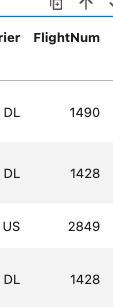

---

## <font color = red> This format is cool

### <font color = blue> Doing itall in one line -- without intermediate DFs

In [42]:
df.groupby('FlightNum')\
.agg({'TotalDelay' : np.mean})\
.sort_values('TotalDelay', ascending=False)\
.head()

,TotalDelay
FlightNum,
2849,183.33
1428,173.78
2928,150.50
2835,124.33
2252,112.23


In [43]:
df.groupby('ScheduledDepTime')\
.agg({'TotalDelay' : np.mean})\
.sort_values('TotalDelay', ascending=False)\
.head()

,TotalDelay
ScheduledDepTime,
Evening,24.29
Early Afternoon,16.04
Morning,5.58
Early Morning,4.07


---

---

# <font color = red> Start Here

# Transforamtions

### appling functions to only specific columns

#### get std score for each

In [44]:
# way to normalizing a variable

In [45]:
#STANDARD SCORE

In [47]:
zscore = lambda x : (x-x.mean()/x.std())

In [48]:
df.groupby('DayOfWeek').transform(zscore)

/var/folders/xj/j51mz36s00z2vnfq7wp23hxm0000gn/T/ipykernel_64837/2462170505.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df.groupby('DayOfWeek').transform(zscore)
/var/folders/xj/j51mz36s00z2vnfq7wp23hxm0000gn/T/ipykernel_64837/2462170505.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df.groupby('DayOfWeek').transform(zscore)
/var/folders/xj/j51mz36s00z2vnfq7wp23hxm0000gn/T/ipykernel_64837/2462170505.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  d

,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotalDelay
0,"1,539.07","1,537.03","1,815.86","1,811.75",234.50,NaN,155.24,153.22,NaN,3.77,...,NaN,-0.06,NaN,-0.05,NaN,NaN,NaN,NaN,NaN,5.72
1,"1,546.18","1,537.14","1,828.00","1,811.87",234.47,NaN,160.24,153.22,NaN,15.69,...,NaN,-0.09,NaN,-0.06,NaN,NaN,NaN,NaN,NaN,24.67
2,"1,537.16","1,537.14","1,799.92","1,811.87",234.47,NaN,141.24,153.23,NaN,-12.16,...,NaN,-0.08,NaN,-0.04,NaN,NaN,NaN,NaN,NaN,-12.20
3,"1,538.19","1,537.14","1,804.98","1,811.87",234.47,NaN,145.26,153.23,NaN,-7.24,...,NaN,-0.09,NaN,-0.05,NaN,NaN,NaN,NaN,NaN,-6.26
4,"1,538.21","1,537.14","1,832.04","1,811.87",234.47,NaN,172.26,153.22,NaN,19.68,...,NaN,-0.09,NaN,-0.06,NaN,NaN,NaN,NaN,NaN,20.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426485,"1,432.16","1,432.14","1,524.92","1,526.87","1,718.47",NaN,51.24,53.23,NaN,-2.16,...,NaN,-0.08,NaN,-0.04,NaN,NaN,NaN,NaN,NaN,-2.20
426486,"1,443.19","1,432.14","1,533.98","1,526.87","1,718.47",NaN,49.26,53.23,NaN,6.76,...,NaN,-0.09,NaN,-0.05,NaN,NaN,NaN,NaN,NaN,17.74
426487,"1,437.21","1,432.14","1,527.04","1,526.87","1,718.47",NaN,48.26,53.22,NaN,-0.32,...,NaN,-0.09,NaN,-0.06,NaN,NaN,NaN,NaN,NaN,4.67
426488,"1,453.19","1,432.15","1,550.98","1,526.88","1,718.47",NaN,56.25,53.22,NaN,23.69,...,NaN,-0.07,NaN,-0.05,NaN,NaN,NaN,NaN,NaN,44.66


---


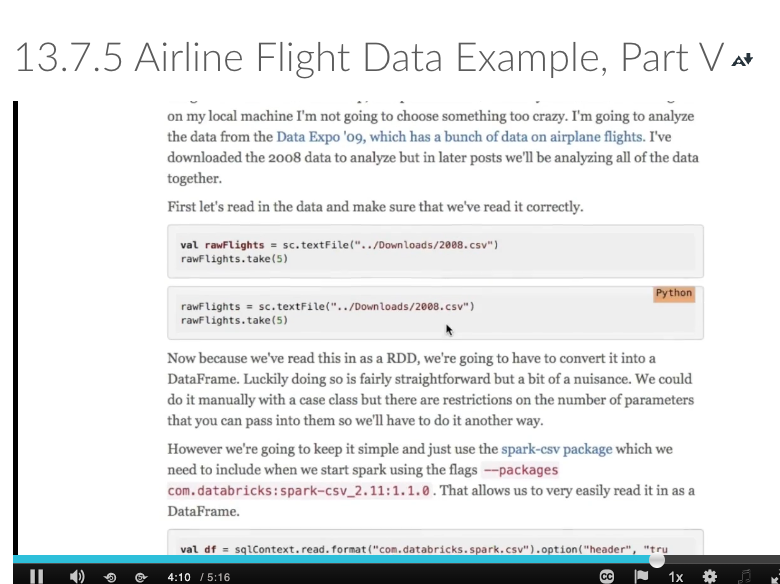

# Apache Spark is based on the same ideas

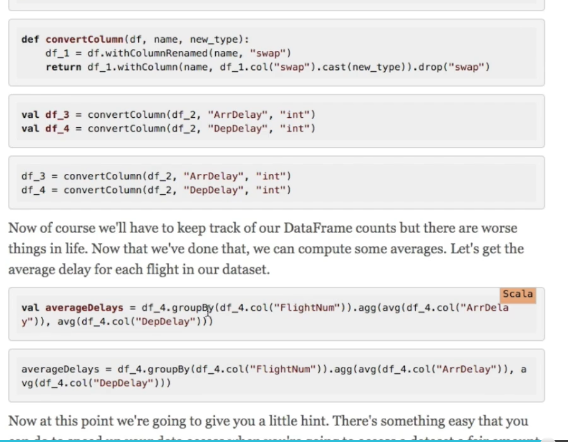